In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pickle

### 1. Reading DataFrame

In [2]:
df=pd.read_csv('Housing_Modified.csv')
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no


In [61]:
df['stories'].unique()

array([2, 1, 3, 4], dtype=int64)

In [4]:
df.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

In [5]:
df.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

In [6]:
df['price'].unique()

array([ 42000.,  38500.,  49500.,  60500.,  61000.,  66000.,  69000.,
        83800.,  88500.,  90000.,  30500.,  27000.,  36000.,  37000.,
        37900.,  40500.,  40750.,  45000.,  48500.,  65900.,  38000.,
        42300.,  43500.,  44000.,  44500.,  44900.,  48000.,  49000.,
        51500.,  61700.,  67000.,  82000.,  54500.,  66500.,  70000.,
        92000.,  41000.,  43000.,  54800.,  55000.,  57000.,  68000.,
        95000.,  25000.,  25245.,  56000.,  35500.,  30000.,  52000.,
        54000.,  60000.,  47000.,  51000.,  32500.,  34000.,  35000.,
        63900.,  50000.,  55500.,  78000.,  58000., 163000., 128000.,
       123500.,  39000.,  53900.,  59900.,  79000., 125000., 132000.,
        58500.,  73000.,  63500.,  46500.,  75000.,  85000.,  93000.,
        94500., 106500., 116000.,  61500.,  80000.,  59500., 117000.,
       122500., 127000.,  49900.,  50500.,  65000.,  46000.,  26500.,
        40000.,  57250.,  62000.,  63000., 130000.,  52900.,  73500.,
        52500.,  320

C:\Users\Shashree\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of price'}, xlabel='price', ylabel='Density'>

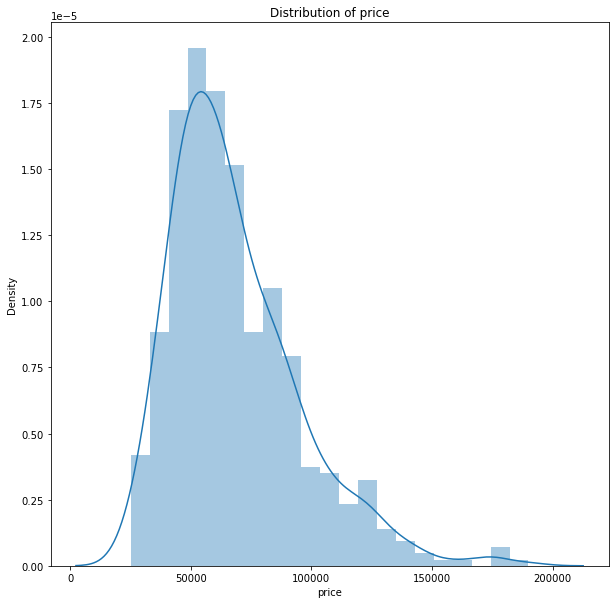

In [7]:
plt.figure(figsize=(10,10))
plt.title("Distribution of price")
sns.distplot(df['price'])

In [8]:
df['lotsize'].unique()

array([ 5850,  4000,  3060,  6650,  6360,  4160,  3880,  4800,  5500,
        7200,  3000,  1700,  2880,  3600,  3185,  3300,  5200,  3450,
        3986,  4785,  4510,  3934,  4960,  3800,  4500,  3500,  4032,
        5170,  5400,  3150,  3745,  4520,  4640,  8580,  2000,  2160,
        3040,  3090,  3350,  5300,  4100,  9166,  4040,  3630,  3620,
        2400,  7260,  4400,  4120,  4750,  4280,  4820,  5040,  6000,
        2500,  4095,  1836,  2475,  3210,  3180,  1650,  4240,  3240,
        3650,  3780,  6480,  6060,  5900,  7420,  8500,  8050,  6800,
        8250,  2835,  4320,  4992,  4600,  3720,  3680,  3750,  5076,
        5000,  4260,  6540,  3700,  3760,  4300,  6840, 10500,  4840,
        5960,  8800,  4560,  3850,  4900,  4370,  7700,  2990,  2650,
        2175,  2610,  2953,  2747,  1905,  3968,  3162,  2910,  2135,
        3120,  4075,  3410,  2800,  2684,  3100,  1950,  2430,  3036,
        3420,  3660,  4410,  3990,  4340,  3510,  5495,  3480,  7424,
        3460,  3635,

C:\Users\Shashree\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of lotsize'}, xlabel='lotsize', ylabel='Density'>

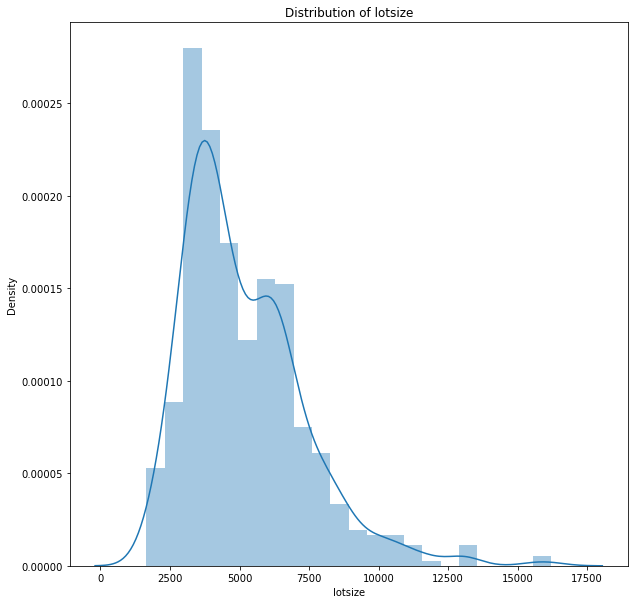

In [9]:
plt.figure(figsize=(10,10))
plt.title("Distribution of lotsize")
sns.distplot(df['lotsize'])

In [10]:
df['bedrooms'].unique()

array([3, 2, 4, 1, 5, 6], dtype=int64)

C:\Users\Shashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count Plot of bedrooms'}, xlabel='bedrooms', ylabel='count'>

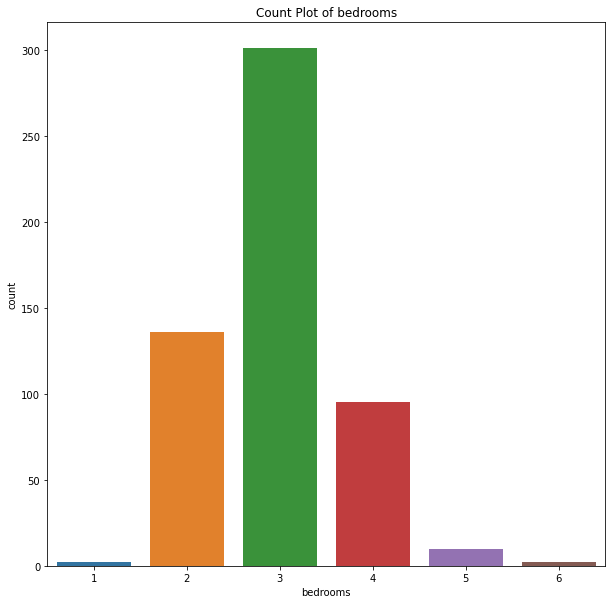

In [11]:
plt.figure(figsize=(10,10))
plt.title("Count Plot of bedrooms")
sns.countplot(df['bedrooms'])

In [12]:
df['bathrms'].unique()

array([1, 2, 3, 4], dtype=int64)

C:\Users\Shashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'count plot of bathrms'}, xlabel='bathrms', ylabel='count'>

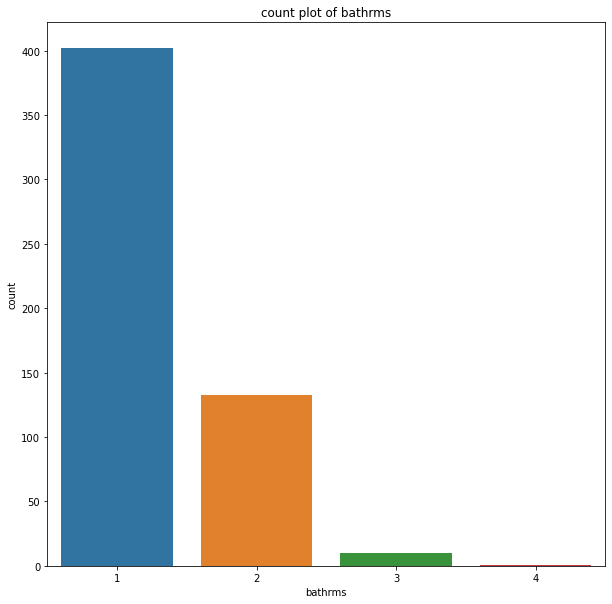

In [13]:
plt.figure(figsize=(10,10))
plt.title("count plot of bathrms")
sns.countplot(df['bathrms'])

In [14]:
df['stories'].unique()

array(['two', 'one', 'three', 'four'], dtype=object)

C:\Users\Shashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count plot of stories'}, xlabel='stories', ylabel='count'>

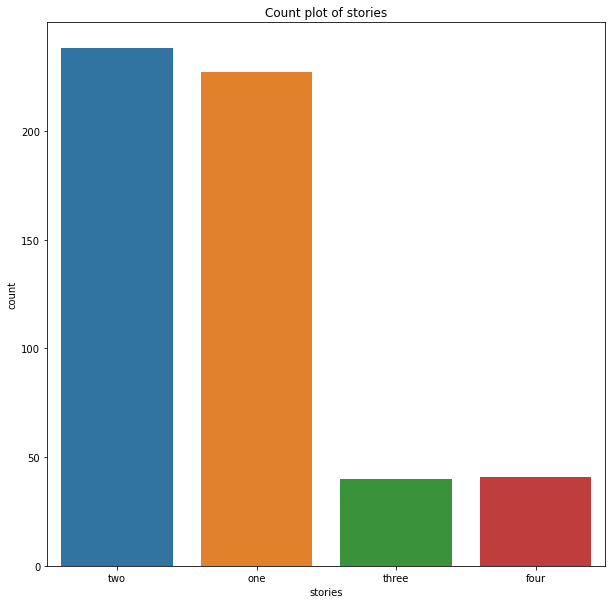

In [15]:
plt.figure(figsize=(10,10))
plt.title("Count plot of stories")
sns.countplot(df['stories'])

In [16]:
df['driveway'].unique()

array(['yes', 'no'], dtype=object)

C:\Users\Shashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count Plot of driveway'}, xlabel='driveway', ylabel='count'>

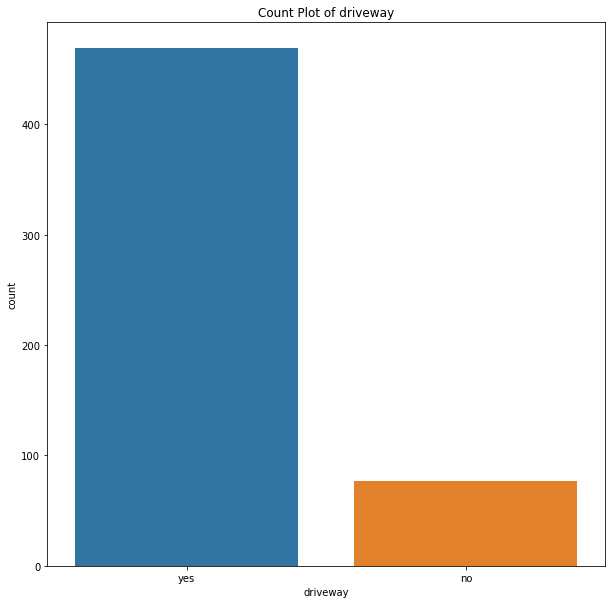

In [17]:
plt.figure(figsize=(10,10))
plt.title("Count Plot of driveway")
sns.countplot(df['driveway'])

In [18]:
df['recroom'].unique()

array(['no', 'yes'], dtype=object)

C:\Users\Shashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count plot of recroom'}, xlabel='recroom', ylabel='count'>

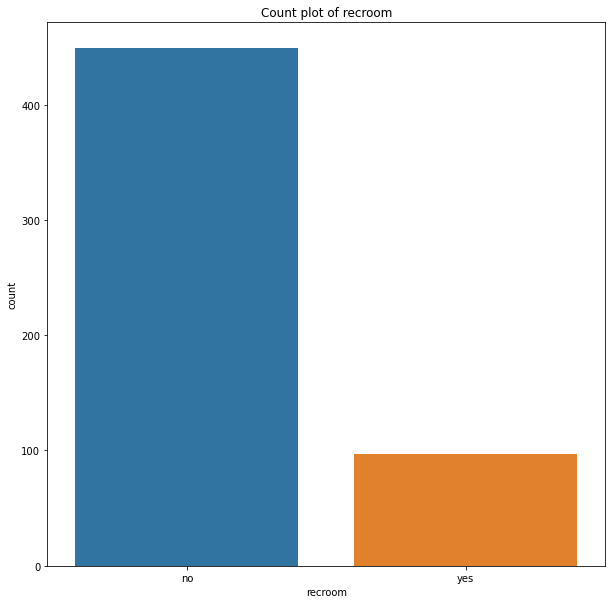

In [19]:
plt.figure(figsize=(10,10))
plt.title("Count plot of recroom")
sns.countplot(df['recroom'])

In [20]:
df['fullbase'].unique()

array(['yes', 'no'], dtype=object)

C:\Users\Shashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count Plot of fullbase'}, xlabel='fullbase', ylabel='count'>

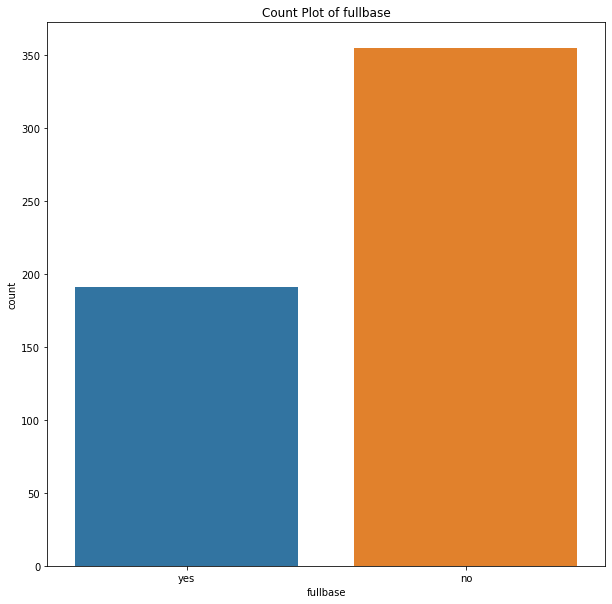

In [21]:
plt.figure(figsize=(10,10))
plt.title("Count Plot of fullbase")
sns.countplot(df['fullbase'])

In [22]:
df.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

In [23]:
df['gashw'].unique()

array(['no', 'yes'], dtype=object)

C:\Users\Shashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count Plot of gashw'}, xlabel='gashw', ylabel='count'>

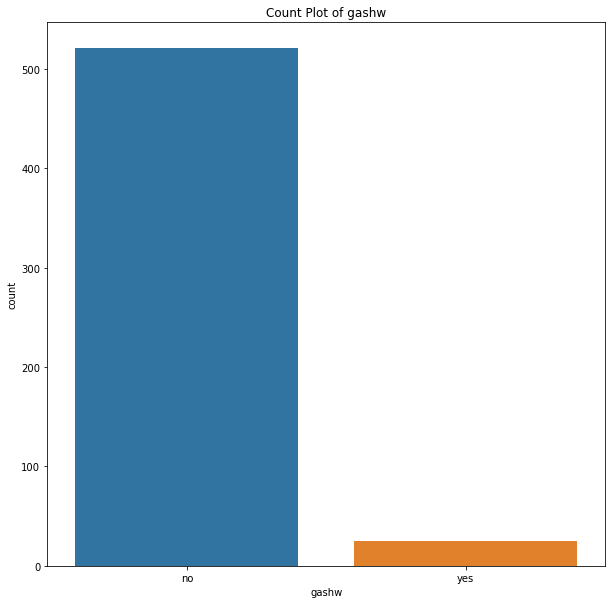

In [24]:
plt.figure(figsize=(10,10))
plt.title("Count Plot of gashw")
sns.countplot(df['gashw'])

In [25]:
df['airco'].unique()

array(['no', 'yes'], dtype=object)

C:\Users\Shashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count Plot of airco'}, xlabel='airco', ylabel='count'>

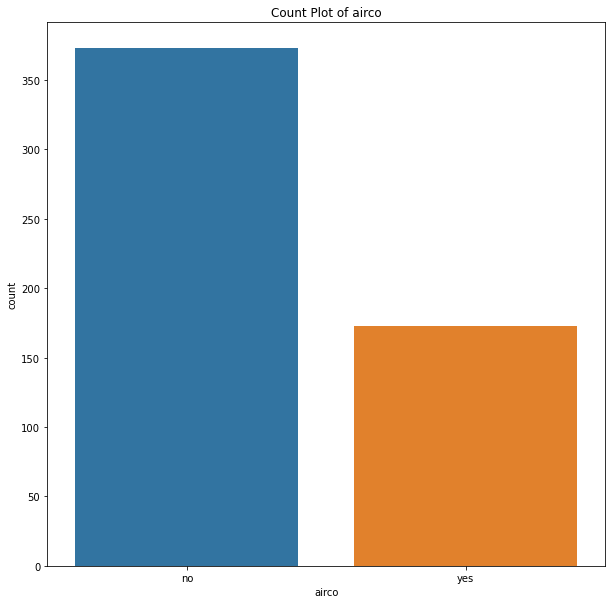

In [26]:
plt.figure(figsize=(10,10))
plt.title("Count Plot of airco")
sns.countplot(df['airco'])

In [27]:
df['garagepl'].unique()

array([1, 0, 2, 3], dtype=int64)

C:\Users\Shashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count Plot of garagepl'}, xlabel='garagepl', ylabel='count'>

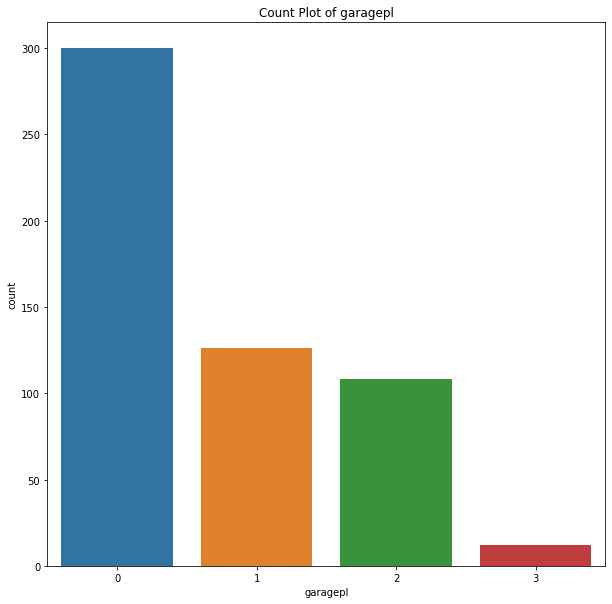

In [28]:
plt.figure(figsize=(10,10))
plt.title("Count Plot of garagepl")
sns.countplot(df['garagepl'])

In [29]:
df['prefarea'].unique()

array(['no', 'yes'], dtype=object)

C:\Users\Shashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count Plot of prefarea'}, xlabel='prefarea', ylabel='count'>

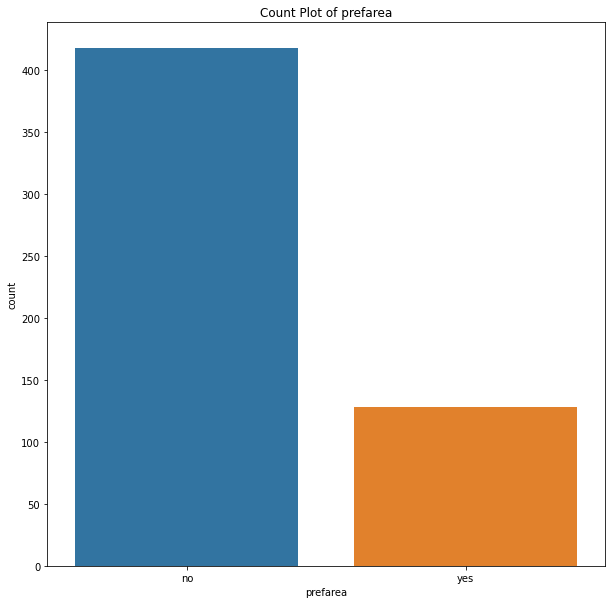

In [30]:
plt.figure(figsize=(10,10))
plt.title("Count Plot of prefarea")
sns.countplot(df['prefarea'])

In [31]:
df.select_dtypes(include='object')

,stories,driveway,recroom,fullbase,gashw,airco,prefarea
0,two,yes,no,yes,no,no,no
1,one,yes,no,no,no,no,no
2,one,yes,no,no,no,no,no
3,two,yes,yes,no,no,no,no
4,one,yes,no,no,no,no,no
...,...,...,...,...,...,...,...
541,four,yes,yes,no,no,yes,no
542,four,yes,no,no,no,yes,no
543,four,yes,yes,no,no,yes,no
544,two,yes,yes,no,no,yes,no


In [32]:
df['stories'].unique()

array(['two', 'one', 'three', 'four'], dtype=object)

In [33]:
df.replace({'two':2, 'one':1, 'three':3, 'four':4},inplace=True)

In [35]:
df['driveway'].unique()

array(['yes', 'no'], dtype=object)

In [36]:
df.replace({'yes':1, 'no':0},inplace=True)

In [39]:
df.replace({'yes':1, 'no':0},inplace=True)

In [40]:
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,61000.0,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,1,1,0,0,1,0,0
542,94000.0,6000,3,2,4,1,0,0,0,1,0,0
543,103000.0,6000,3,2,4,1,1,0,0,1,1,0
544,105000.0,6000,3,2,2,1,1,0,0,1,1,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    int64  
 6   recroom   546 non-null    int64  
 7   fullbase  546 non-null    int64  
 8   gashw     546 non-null    int64  
 9   airco     546 non-null    int64  
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 51.3 KB


#### Important Features

<AxesSubplot:title={'center':'Heatmap for correlation'}>

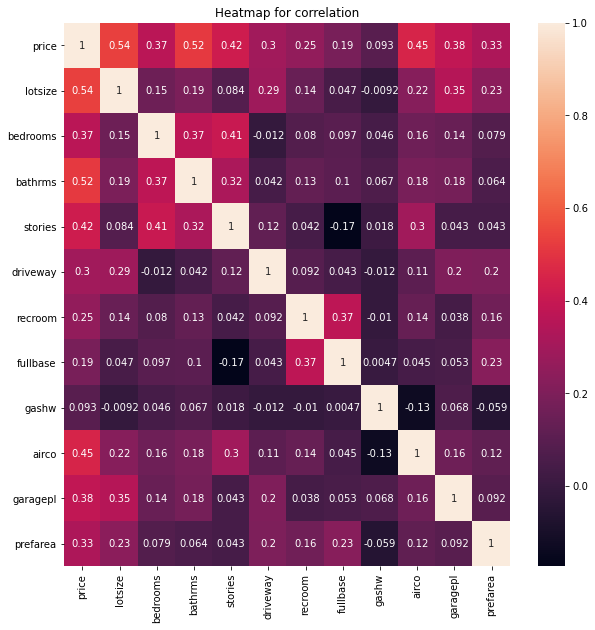

In [43]:
plt.figure(figsize=(10,10))
plt.title("Heatmap for correlation")
sns.heatmap(df.corr(),annot=True)

#### Splitting the data

In [44]:
x=df.drop('price',axis=1)
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [48]:
x_train.shape

(436, 11)

In [47]:
y_train.shape

(436,)

In [49]:
x_test.shape

(110, 11)

In [50]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
y_pred=lr.predict(x_test)
score=lr.score(x_train,y_train)
score

0.6828801124522611

In [53]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=lr, X=x_train,y=y_train,cv=10)
accuracies

array([0.54995901, 0.80596377, 0.66409379, 0.64659324, 0.49841608,
       0.73706085, 0.59360594, 0.62512016, 0.73117777, 0.69103824])

In [55]:
mean_accuracy=accuracies.mean()
mean_accuracy

0.6543028868927954

In [57]:
pickle.dump(lr,open("model.pkl",'wb'))
model=pickle.load(open('model.pkl','rb'))

In [58]:
x_train.columns

Index(['lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway', 'recroom',
       'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

In [59]:
df['stories'].unique()

array([2, 1, 3, 4], dtype=int64)

In [63]:
data=[[1000,1,1,2,1,1,0,0,0,1,1]]
new_df=pd.DataFrame(data,columns=['lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway', 'recroom',
       'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'])
single=lr.predict(new_df)
single

array([54836.89989913])